In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Generic functions

### Generic walk function

In [183]:
def walk(effective_jump,n):
    position = 0
    trajectory = np.zeros(n+1)
    for m in range(n-1):
        position += effective_jump(position,m,n)
        trajectory[m+1] = position
    return trajectory

### Generic Acceptance-rejection function

In [184]:
def effective_jump_ARS(free_jump,acceptance_probability,position,m,n):
    p_accept = 0
    while np.random.rand() > p_accept:
        eta = free_jump()
        p_accept = acceptance_probability(position,eta,m,n)
    return eta

# Bridge random walks

## Lattice bridge random walk 

In [185]:
def effective_jump_lattice(position,m,n):
    p_right = 1/2*(1-position/(n-m))
    if np.random.rand() < p_right:
        return +1
    else:
        return -1

In [191]:
n = 10
trajectory_lattice = walk(effective_jump_lattice,n)

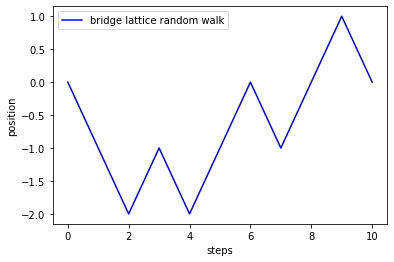

In [192]:
plt.plot(trajectory_lattice,'b',label='bridge lattice random walk')
plt.xlabel('steps')
plt.ylabel('position')
plt.legend()

## Gaussian bridge random walk

### Direct sampling

In [193]:
def effective_jump(position,m,n):
    mu = -position/(n-m)
    sigma = np.sqrt((n-m-1)/(n-m))
    return mu + sigma * np.random.randn()

In [194]:
n = 10
trajectory = walk(effective_jump,n)

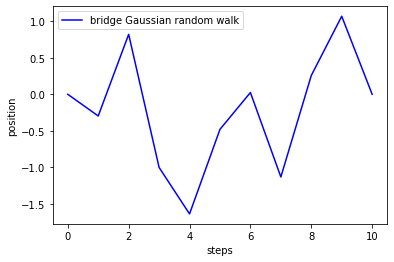

In [195]:
plt.plot(trajectory,'b',label='bridge Gaussian random walk')
plt.xlabel('steps')
plt.ylabel('position')
plt.legend()

### Acceptance-rejection sampling

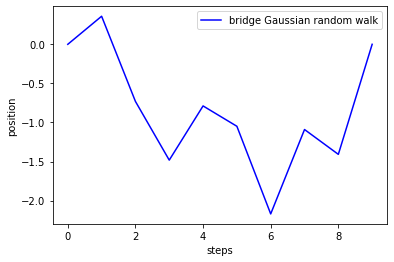

In [64]:
def free_jump():
    return np.random.randn()
def acceptance_probability(position,eta,m,n):
    return np.exp(-(position+eta)**2/(2*(n-m-1)))
def effective_jump(position,m,n):
    return effective_jump_ARS(free_jump,acceptance_probability,position,m,n)

In [200]:
n = 10
trajectory = walk(effective_jump,n)

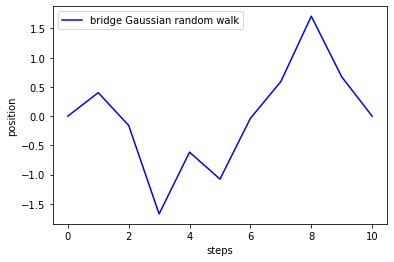

In [201]:
plt.plot(trajectory,'b',label='bridge Gaussian random walk')
plt.xlabel('steps')
plt.ylabel('position')
plt.legend()

## Cauchy bridge random walk

In [202]:
def free_jump():
    return np.random.standard_cauchy()
def acceptance_probability(position,eta,m,n):
    return 1/(1+((position+eta)/(n-m))**2)
def effective_jump(position,m,n):
    return effective_jump_ARS(free_jump,acceptance_probability,position,m,n)

In [209]:
n = 10
trajectory = walk(effective_jump,n)

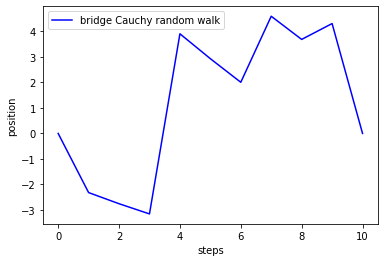

In [210]:
plt.plot(trajectory,'b',label='bridge Cauchy random walk')
plt.xlabel('steps')
plt.ylabel('position')
plt.legend()

## Student bridge random walk

In [70]:
def free_jump():
    return np.random.standard_t(3)
def acceptance_probability(position,eta,m,n):
    return 
def effective_jump(position,m,n):
    return effective_jump_ARS(free_jump,acceptance_probability,position,m,n)

plt.plot(walk(effective_jump,n),'b',label='bridge Student random walk')
plt.xlabel('steps')
plt.ylabel('position')
plt.legend()

TypeError: '>' not supported between instances of 'float' and 'NoneType'

# Excursions random walks

## Lattice excursion random walk

In [213]:
def effective_jump(position,m,n):
    p_right = 1/2*(1+(n-m-position*(position+2))/((position+1)*(n-m)))
    if np.random.rand() < p_right:
        return 1
    else:
        return -1

In [216]:
n = 10
trajectory = walk(effective_jump,n)

Text(0, 0.5, 'position')

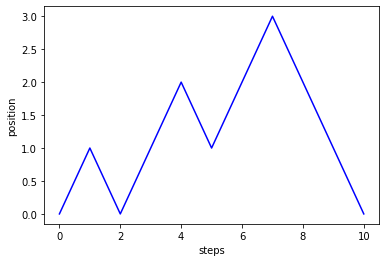

In [217]:
plt.plot(trajectory,'b',label='excursion lattice random walk')
plt.xlabel('steps')
plt.ylabel('position')